In [1]:
import pandas as pd
import statsmodels.api as sm

# 1.) Import Data from FRED

In [2]:
data = pd.read_csv("TaylorRuleData.csv", index_col = 0)

In [3]:
data.index = pd.to_datetime(data.index)

In [8]:
data.dropna(inplace = True)

In [9]:
data.head()

,FedFunds,Unemployment,HousingStarts,Inflation
1959-01-01,2.48,6.0,1657.0,29.01
1959-02-01,2.43,5.9,1667.0,29.00
1959-03-01,2.80,5.6,1620.0,28.97
1959-04-01,2.96,5.2,1590.0,28.98
1959-05-01,2.90,5.1,1498.0,29.04


# 2.) Do Not Randomize, split your data into Train, Test Holdout

In [12]:
split1 = int(len(data)* .6)
split2 = int(len(data)* .9)
data_in = data[:split1]
data_out = data[split1:split2]
data_hold = data[split2:]

In [13]:
X_in = data_in.iloc[:,1:]
y_in = data_in.iloc[:,0]
X_out = data_out.iloc[:,1:]
y_out = data_out.iloc[:,0]
X_hold = data_hold.iloc[:,1:]
y_hold = data_hold.iloc[:,0]

In [14]:
# Add Constants
X_in = sm.add_constant(X_in)
X_out =  sm.add_constant(X_out)
X_hold =  sm.add_constant(X_hold)

# 3.) Build a model that regresses FF~Unemp, HousingStarts, Inflation

In [16]:
model1 = sm.OLS(y_in, X_in).fit()

# 4.) Recreate the graph fro your model

In [17]:
import matplotlib.pyplot as plt

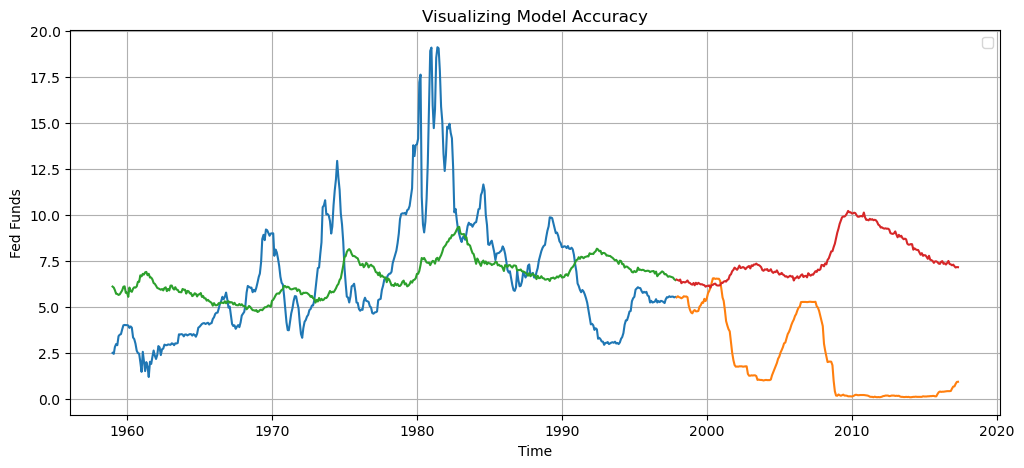

In [25]:
plt.figure(figsize = (12,5))

###
plt.plot(y_in)
plt.plot(y_out)
plt.plot(model1.predict(X_in))
plt.plot(model1.predict(X_out))
###

plt.ylabel("Fed Funds")
plt.xlabel("Time")
plt.title("Visualizing Model Accuracy")
plt.legend([])
plt.grid()
plt.show()

## "All Models are wrong but some are useful" - 1976 George Box

# 5.) What are the in/out of sample MSEs

In [27]:
from sklearn.metrics import mean_squared_error

In [28]:
in_mse_1 = mean_squared_error(y_in,model1.predict(X_in))
out_mse_1 = mean_squared_error(y_out,model1.predict(X_out))

In [29]:
print("Insample MSE : ", in_mse_1)
print("Outsample MSE : ", out_mse_1)

Insample MSE :  10.071422013168643
Outsample MSE :  40.3608278356685


# 6.) Using a for loop. Repeat 3,4,5 for polynomial degrees 1,2,3

In [31]:
from sklearn.preprocessing import PolynomialFeatures

In [47]:
max_degrees = 3

Degrees :  1


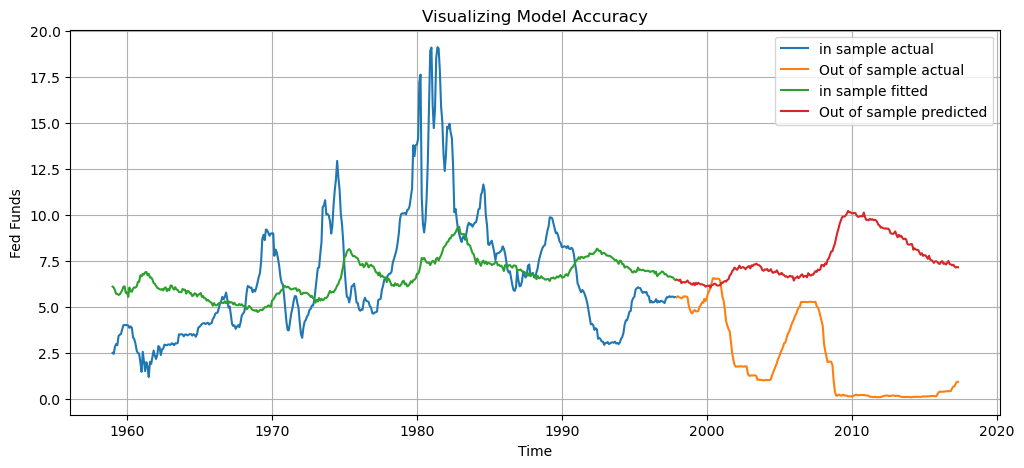

In sample MSE: 10.071422013168641
Out sample MSE: 40.36082783565204
___________________
Degrees :  2


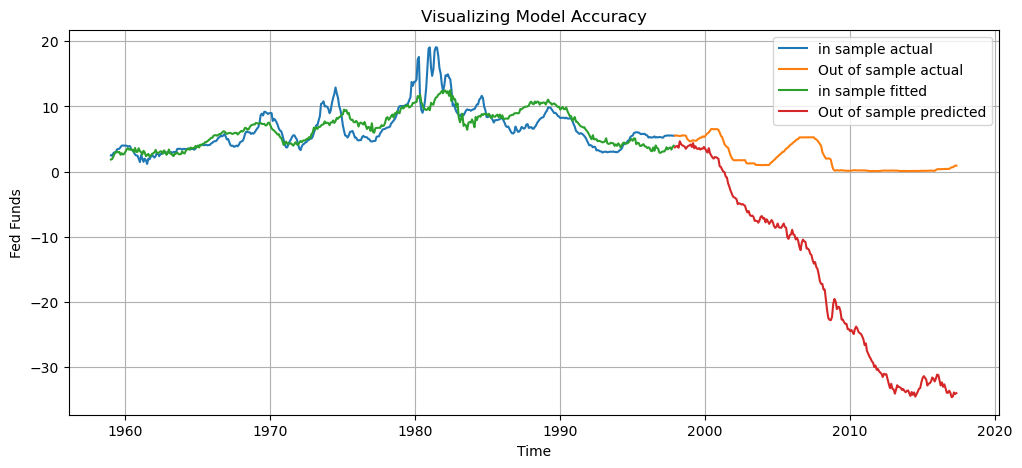

In sample MSE: 3.863477139276068
Out sample MSE: 481.4465099024405
___________________
Degrees :  3


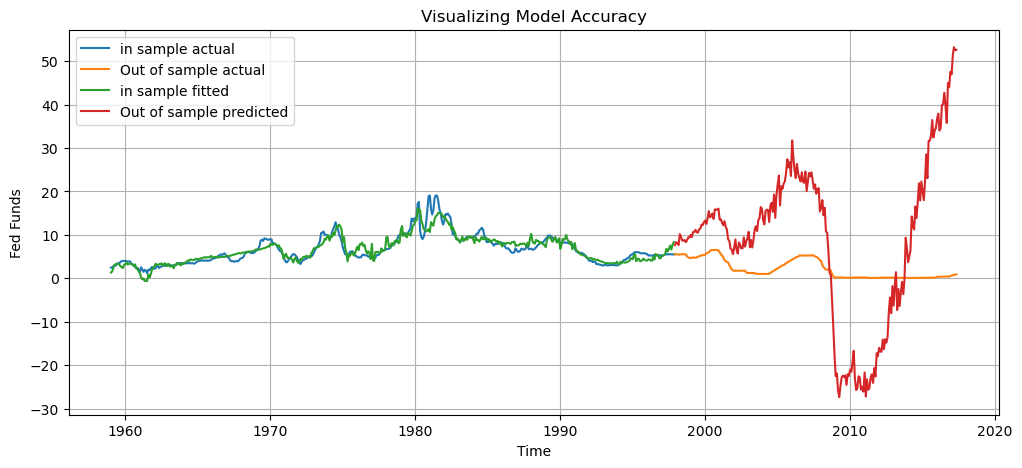

In sample MSE: 1.8723636288250916
Out sample MSE: 371.7672642959744
___________________


In [49]:
for degrees in range(1, 1+max_degrees):
    print("Degrees : ", degrees)
    
    poly = PolynomialFeatures(degree = degrees)
    X_in_poly = poly.fit_transform(X_in)
    X_out_poly = poly.transform(X_out)

#Q3
    model1 = sm.OLS(y_in,X_in_poly).fit()

#Q4
    plt.figure(figsize = (12,5))

    in_preds= model1.predict(X_in_poly)
    in_preds = pd.DataFrame(in_preds, index = y_in.index)
    out_preds = model1.predict(X_out_poly)
    out_preds = pd.DataFrame(out_preds, index = y_out.index)


    plt.plot(y_in)
    plt.plot(y_out)
    plt.plot(in_preds)
    plt.plot(out_preds)
    
    plt.ylabel("Fed Funds")
    plt.xlabel("Time")
    plt.title("Visualizing Model Accuracy")
    plt.legend(["in sample actual", "Out of sample actual", "in sample fitted","Out of sample predicted"])
    plt.grid()
    plt.show()




# Q5

    in_mse_1 = mean_squared_error(y_in,model1.predict(X_in_poly))
    out_mse_1 = mean_squared_error(y_out,model1.predict(X_out_poly))
    print("In sample MSE:", in_mse_1)
    print("Out sample MSE:", out_mse_1)
    print("___________________")

# 7.) State your observations :

The first-degree model has the highest in-sample MSE, indicating a less accurate fit to the training data but it has the smallest out-of-sample MSE, suggesting better generalization to new data.

The second-degree model greatly improves in-sample prediction with a lower MSE, but the out-of-sample MSE is significantly higher, indicating potential overfitting.

The third-degree model continues the trend of improving in-sample predictions with an even lower MSE of 1.87, suggesting a very close fit to the training data. Yet, similar to the second-degree model, the third-degree model's predictions for out-of-sample data result in a high MSE of 371.77. This is a substantial increase from the first-degree model's out-of-sample MSE, yet it is still an improvement over the second-degree model's out-of-sample MSE, reduced by approximately 200. This points to a better but still imperfect ability to generalize compared to the first-degree model.

Overall, the first-degree model, despite its less precise fit for the in-sample data, offers the most stable performance for out-of-sample predictions, indicating a better balance between fitting the training data and generalizing to new data. The second and third-degree models, although they fit the in-sample data more accurately, suffer from high out-of-sample MSEs, suggesting overfitting to the training data.